In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [3]:
data = pd.read_csv('IMDB Dataset.csv')
data_copy=data.copy(deep=True)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
from bs4 import BeautifulSoup
import re
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_html_tag(text):
    text = re.sub('', '', text)
    text = re.sub(r'(?<=[.,])(?=[^\s])', r' ', text)
    return text
data['review'] = data['review'].apply(remove_html_tag)
data['review'] = data['review'].apply(strip_html)
data.head(10)

<ipython-input-7-4673348cc628>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review'] = data['review'].apply(remove_special_characters)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from nltk.stem import WordNetLemmatizer
word_mapping = {
    'is': 'be',
    'has': 'have',
    'does': 'do',
    'goes': 'go',
    'was': 'be'
}
#Stemming the text
def lemmatize_text(text):
    wnl = nltk.stem.WordNetLemmatizer()
    text= ' '.join([word_mapping[word] if word in word_mapping else wnl.lemmatize(word, pos = 'n') for word in text.split()])
    return text
#Apply function on review column
data['review'] = data['review'].apply(lemmatize_text)
data.head(10)

,review,sentiment
0,One of the other reviewer have mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this be a wonderful way to spend tim...,positive
3,Basically there a family where a little boy Ja...,negative
4,Petter Matteis Love in the Time of Money be a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show be an amazing fresh innovative idea ...,negative
8,Encouraged by the positive comment about this ...,negative
9,If you like original gut wrenching laughter yo...,positive


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokenizer=ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data['review'] = data['review'].apply(remove_stopwords)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,One reviewer mentioned watching 1 Oz episode y...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
5,Probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated Seahunt...,positive
7,show amazing fresh innovative idea 70 first ai...,negative
8,Encouraged positive comment film looking forwa...,negative
9,like original gut wrenching laughter like movi...,positive


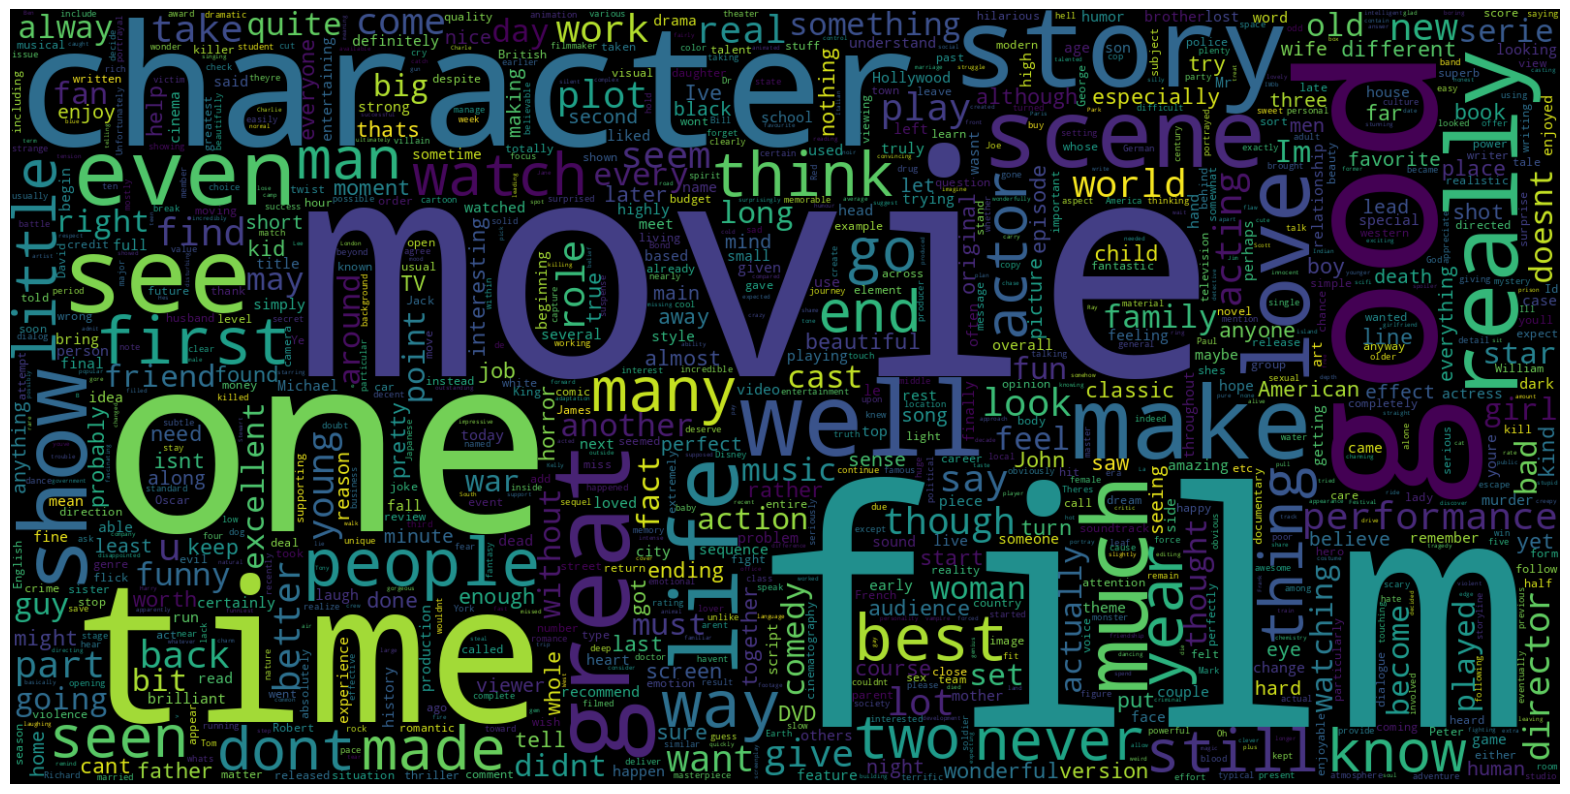

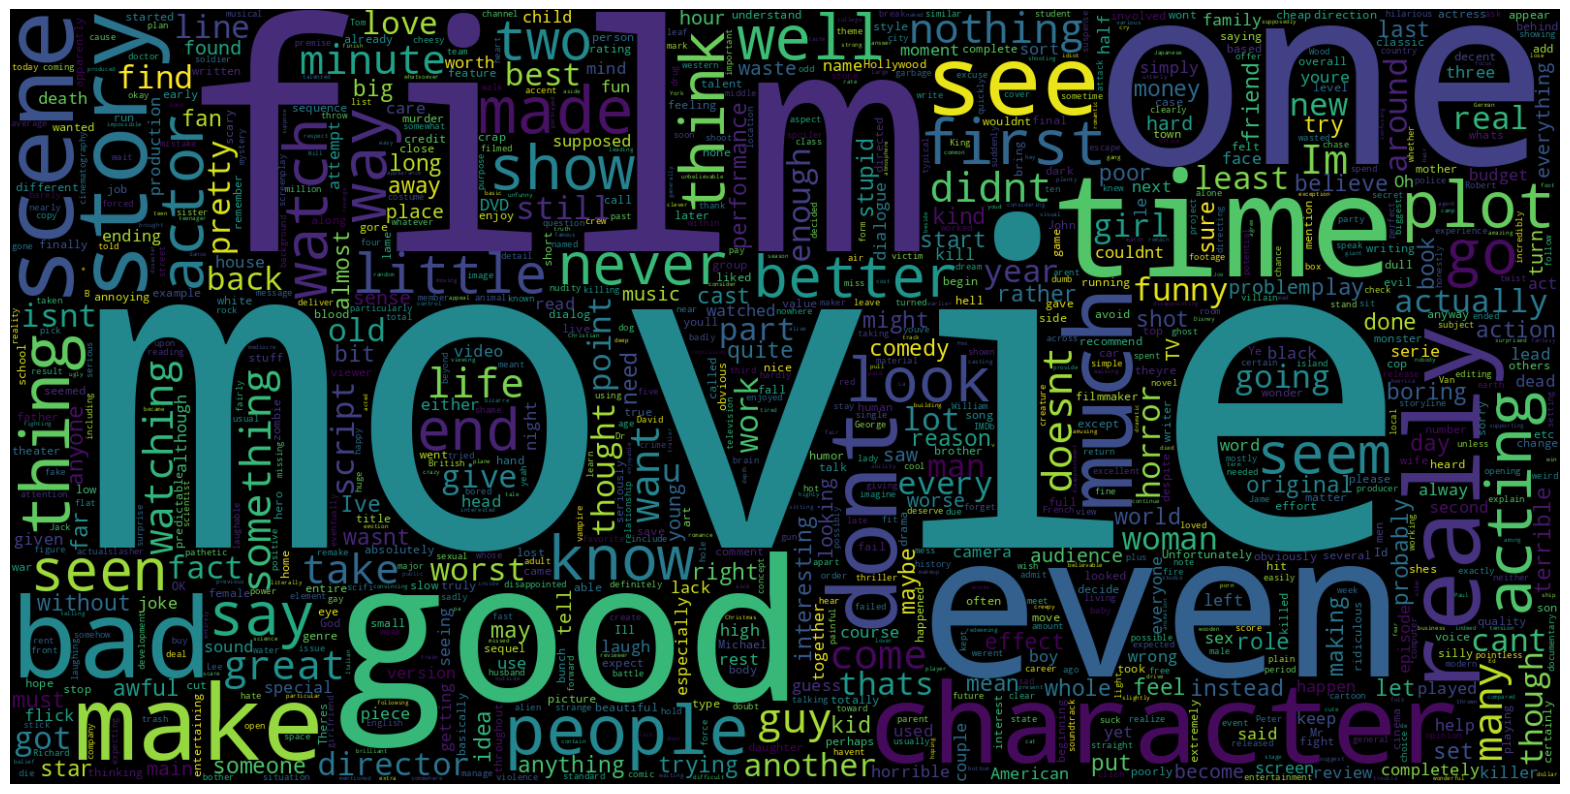

In [12]:
from wordcloud import WordCloud
negative_data = data.loc[data['sentiment'] == 'negative']
positive_data = data.loc[data['sentiment'] == 'positive']
positive_text = ''.join(positive_data['review'])
negative_text = ''.join(negative_data['review'])
# Create and generate a word cloud image:
pos_wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(positive_text)
neg_wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(negative_text)
# Display the generated image:
plt.figure(figsize = (20,20))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.figure(figsize = (20,20))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
data.to_csv('After Preprocessed.csv')
files.download('After Preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Featurization of data

In [14]:
data_model=pd.read_csv("/content/After Preprocessed.csv")

In [15]:
data_model.head()

,Unnamed: 0,review,sentiment
0,0,One reviewer mentioned watching 1 Oz episode y...,positive
1,1,wonderful little production filming technique ...,positive
2,2,thought wonderful way spend time hot summer we...,positive
3,3,Basically family little boy Jake think zombie ...,negative
4,4,Petter Matteis Love Time Money visually stunni...,positive


In [16]:
X=data_model['review']
Y=data['sentiment']
print(X.shape)
print(Y.shape)

(50000,)
(50000,)


In [17]:
from sklearn.model_selection import train_test_split

In [21]:
# splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
print('TRAIN DATA - ',X_train.shape)
print('\n')
print('TEST DATA - ',X_test.shape)

TRAIN DATA -  (40000,)


TEST DATA -  (10000,)


#Bag of words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
#bag of words
vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_bow.fit(X_train.values)  #fitting
x_train_bow= vectorizer_bow.transform(X_train.values)
x_test_bow= vectorizer_bow.transform(X_test.values)

print("After vectorizations")
print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)
print("="*40)

After vectorizations
(40000, 5000) (40000,)
(10000, 5000) (10000,)


#Tf-ldf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
#tfidf
tfidfvectorizer = TfidfVectorizer(min_df=10)
text_tfidf = tfidfvectorizer.fit(X_train.values) #fitting

X_train_tfidf =tfidfvectorizer.transform(X_train.values)
X_test_tfidf =tfidfvectorizer.transform(X_test.values)

print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*40)

After vectorizations
(40000, 22067) (40000,)
(10000, 22067) (10000,)


#Modeling

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)# hyper parameter tuning

logreg_cv.fit(X_train_tfidf,  y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.89495


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
lr= LogisticRegression(C= 3.727593720314938)
lr.fit(X_train_tfidf,  y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3.727593720314938)

In [30]:
print("Accuracy: ",(accuracy_score(y_test,lr.predict(X_test_tfidf))))

Accuracy:  0.8981


In [31]:
lr.classes_

array(['negative', 'positive'], dtype=object)

In [32]:
y_test_pred = lr.predict(X_test_tfidf)

In [33]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr.classes_)
cm

array([[4391,  570],
       [ 449, 4590]])

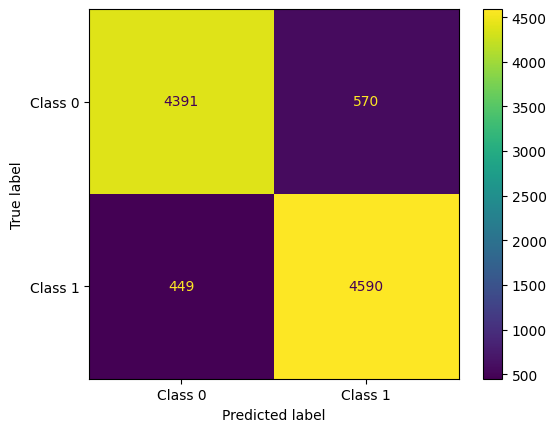

In [34]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Class 0', 'Class 1'])
cm_disp.plot()